In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps

from monte_carlo import *
from quasi_monte_carlo import *
from approximations import *
from genPathes import *
from analytical import *

In [2]:
r = 0.3
sig = 0.2

S0 = 3.0
K = 1.0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

Nsim = 100000

In [3]:
t = 0.5
St = S0 * np.exp(r * t)

It = (S0 + St) * t / 2

# Arithmetic mean test

In [4]:
Nsims = 2 ** np.arange(1, 15)
n = 20

nt = 150

mu, var = ArithmeticMeanMoments(r, sig, t, T, St, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, A = genArithmeticMean(r, sig, t, T, St, It, Nsim, nt)
        mu_list.append(np.mean(A))
        var_list.append(np.std(A) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))

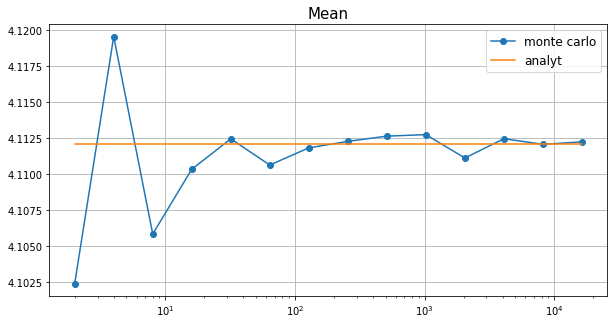

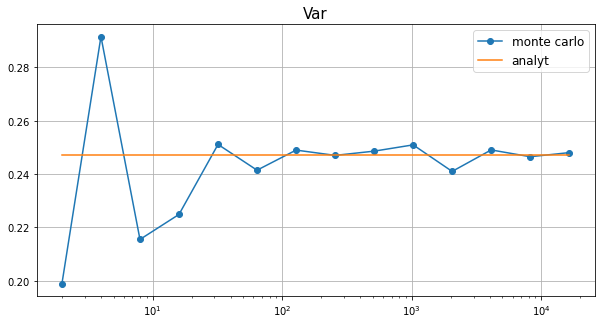

In [5]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

# Geometric mean test

In [6]:
It = (np.log(S0) + np.log(St)) / 2 * t

In [7]:
Nsims = 2 ** np.arange(1, 15)
n = 30

nt = 150

mu, var = GeometricMeanMoments(r, sig, t, T, St, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, G = genGeometricMean(r, sig, t, T, St, It, Nsim, nt)
        mu_list.append(np.mean(G))
        var_list.append(np.std(G) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))

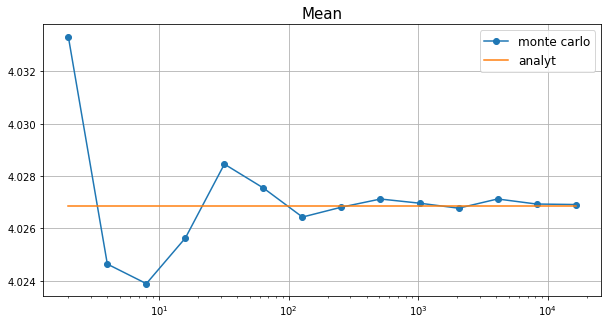

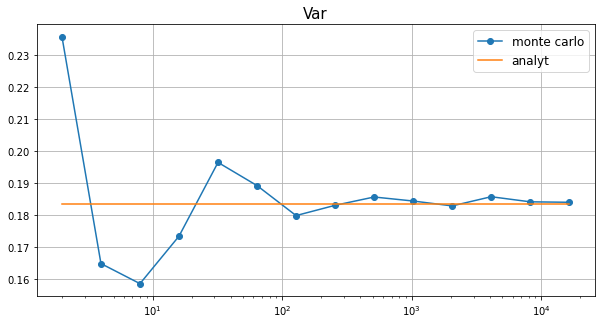

In [8]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

# Conditional moments test

In [9]:
t = 0.54

In [10]:
St = S0 * np.exp(r * t)

ST = S0 * np.exp(r * T)

It = (S0 + St) / 2 * t

In [11]:
mu, var = ConditionalMoments(r, sig, t, T, St, ST, It)

In [12]:
Nsims = 2 ** np.arange(3, 18)
n = 15

nt = 50

mu, var = ConditionalMoments(r, sig, t, T, St, ST, It)

mu_ = []
var_ = []
for Nsim in Nsims:
    mu_list = []
    var_list = []
    for _ in range(n):
        S, A = genConditionalArithmeticMean(r, sig, t, T, St, ST, It, Nsim, nt)
        mu_list.append(np.mean(A))
        var_list.append(np.std(A) ** 2)
    mu_.append(np.mean(mu_list))
    var_.append(np.mean(var_list))
mu_ = np.asarray(mu_)
var_ = np.asarray(var_)

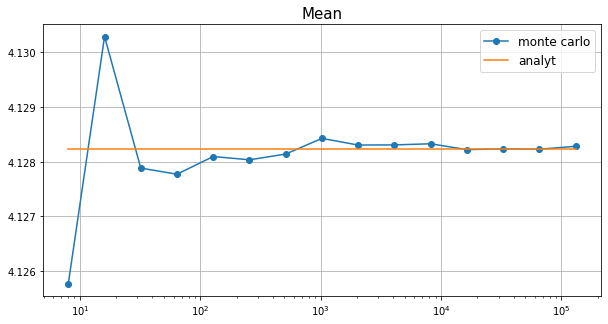

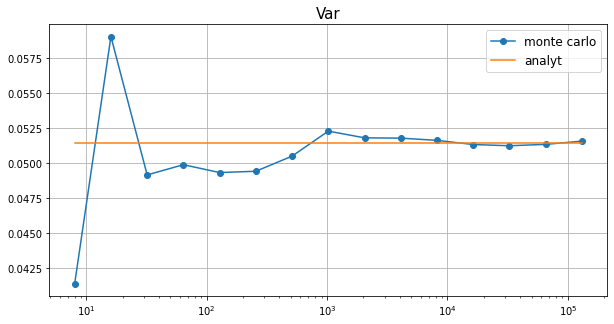

In [13]:
plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, mu_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * mu, label='analyt')
plt.title("Mean", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

plt.figure(figsize=(10, 5))
plt.semilogx(Nsims, var_, '-o', label='monte carlo')
plt.semilogx(Nsims, np.ones_like(Nsims) * var, label='analyt')
plt.title("Var", fontsize=15)
plt.legend(fontsize=12)
plt.grid()

In [14]:
assert False

AssertionError: 

# Geometric mean options

In [15]:
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats as sps

from monte_carlo import *
from quasi_monte_carlo import *
from approximations import *
from genPathes import *
from analytical import *

In [25]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

Nt = 20
tn = np.linspace(0, T, Nt + 1)

nt = 50

Nsim = 100

Kn = S0 * np.linspace(0.4, 2.3)

In [26]:
ts = np.linspace(0, 0.99, 5) * T

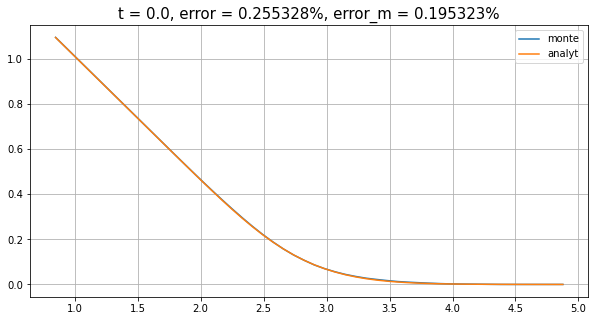

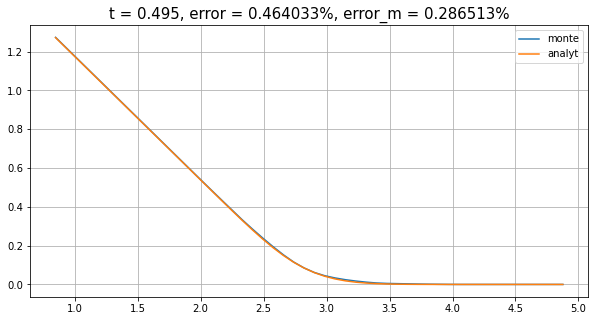

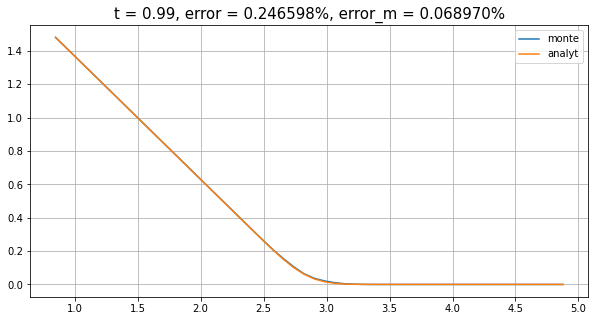

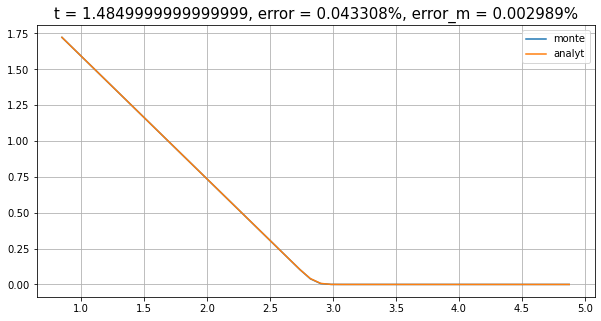

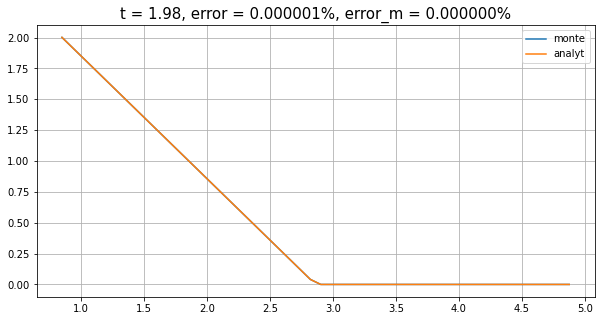

In [28]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (np.log(S0) + np.log(St))
    
    res = MonteCarloGeometricMean(r, sig, t, T, St, It, Kn, Nsim, nt)
    C, Cmatch = res['MC'], res['MC_MM']
    Can = GeometricMeanAnalytical(r, sig, t, T, St, It, Kn)

    err = np.linalg.norm(C - Can) / np.linalg.norm(C) * 100
    err_m = np.linalg.norm(Cmatch - Can) / np.linalg.norm(C) * 100
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}, error = {err:3f}%, error_m = {err_m:3f}%", fontsize=15)
    plt.plot(Kn, C, label='monte')
    plt.plot(Kn, Can, label='analyt')
    plt.legend()
    plt.grid()

# Arithmetic options

In [29]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

nt = 50

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

ts = np.linspace(0, 0.99, 5) * T

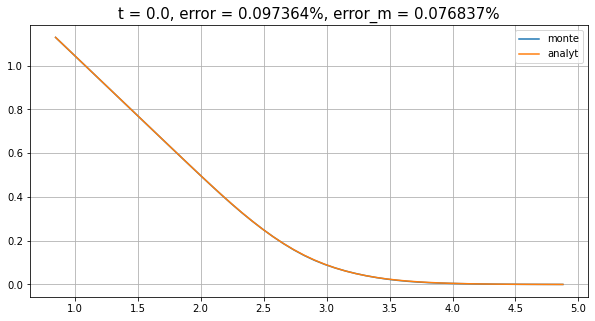

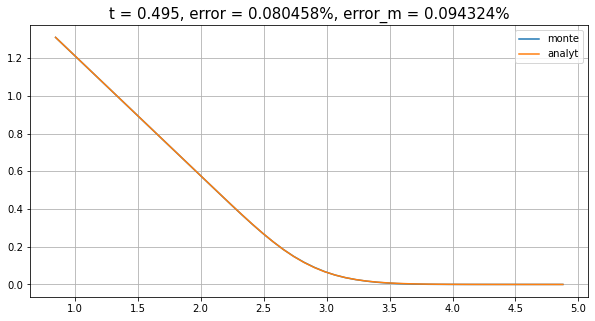

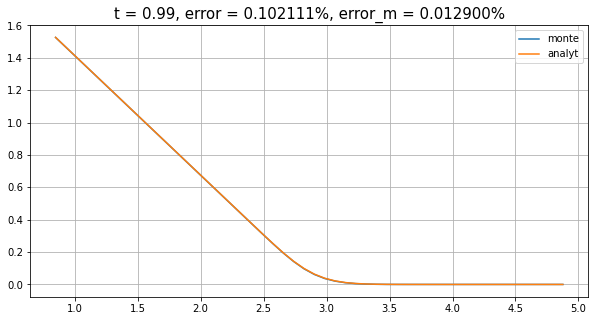

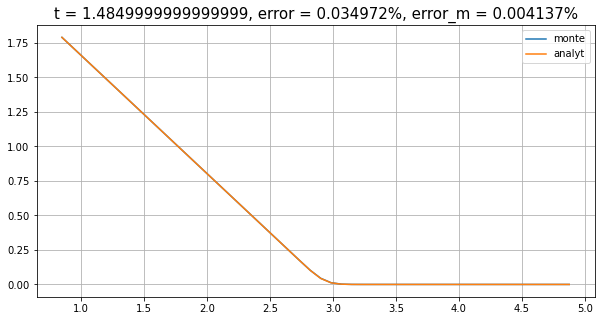

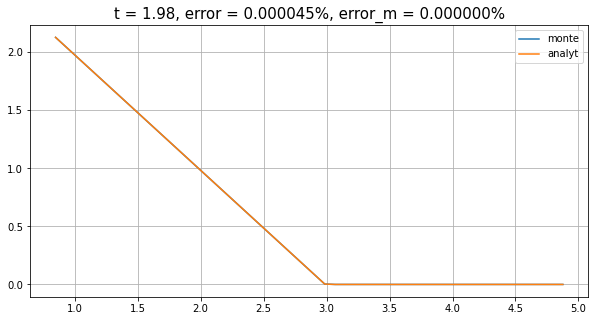

In [30]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (S0 + St)
    
    res = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim, nt)
    C, Cmatch = res['MC'], res['MC_MM']
    Can = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim=500000, nt=nt)['MC_MM']

    err = np.linalg.norm(C - Can) / np.linalg.norm(C) * 100
    err_m = np.linalg.norm(Cmatch - Can) / np.linalg.norm(C) * 100
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}, error = {err:3f}%, error_m = {err_m:3f}%", fontsize=15)
    plt.plot(Kn, C, label='monte')
    plt.plot(Kn, Can, label='analyt')
    plt.legend()
    plt.grid()

# Lognormal and stratified lognormal approximation

In [31]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

nt = 100

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

ts = np.linspace(0, 0.5, 5) * T

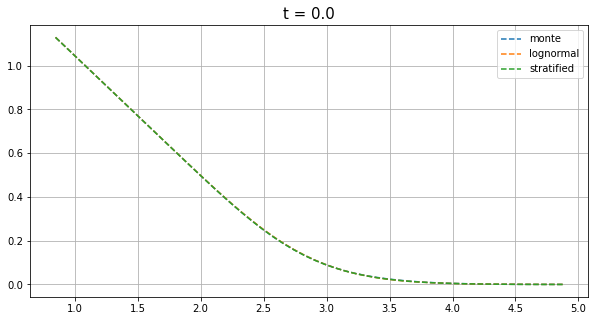

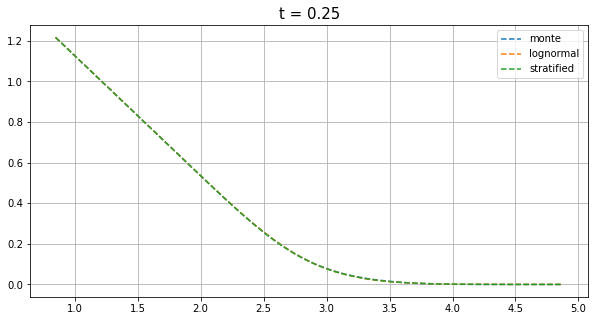

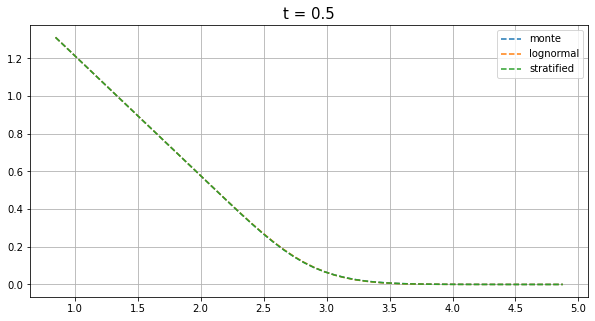

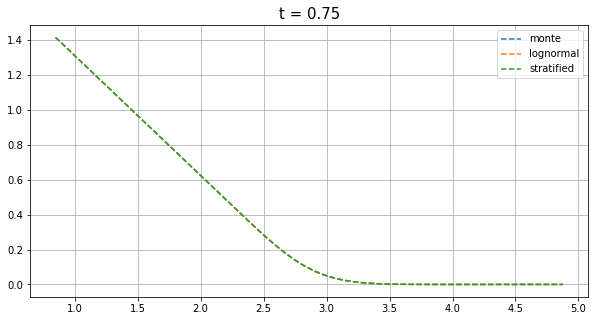

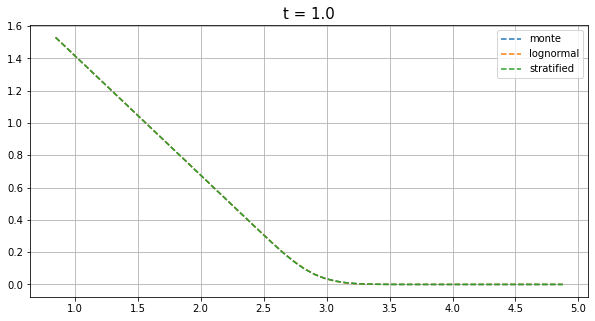

In [33]:
for t in ts:
    
    St = S0 * np.exp(r * t)
    
    #накопленный интеграл
    It = 0.5 * t * (S0 + St)
    
    C = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim, nt)['MC_MM']
    C_log = LognormalApprox(r, sig, t, T, St, It, Kn)
    C_strat = StratifiedLognormalApprox(r, sig, t, T, St, It, Kn)
    plt.figure(figsize=(10, 5))

    plt.title(f"t = {t}", fontsize=15)
    plt.plot(Kn, C, '--',label='monte')
    plt.plot(Kn, C_log, '--', label='lognormal')
    plt.plot(Kn, C_strat, '--', label='stratified')
    plt.legend()
    plt.grid()

# Control variate

In [34]:
r = 0.3
sig = 0.2

S0 = 2.12
K = S0
T = 2.0

nt = 100

Nsim = 1000

Kn = S0 * np.linspace(0.4, 2.3)

t = 0.5

St = S0 * np.exp(r * t)

In [35]:
from collections import defaultdict
from tqdm import tqdm

In [55]:
nit = 20

Ns = 2 ** (np.arange(5, 15))

errors = defaultdict(list)

I1 = 0.5 * t * (np.log(S0) + np.log(St))
I2 = 0.5 * t * (S0 + St)

Canalyt = MonteCarloArithmeticMean(r, sig, t, T, St, I2, Kn, Nsim=500_000, nt=nt)['MC_MM']

for N in tqdm(Ns):
    
    Cquasi = QuasiMonteCarloArithmeticMean(r, sig, t, T, St, I2, Kn, N, nt)
    errors['quasi'].append(100 * np.linalg.norm( Cquasi - Canalyt )  / np.linalg.norm(Canalyt) )
    
    crnt_errors = defaultdict(list)
    for _ in range(nit):
        res = MonteCarloArithmeticMeanControlVariate(r, sig, t, T, St, I1, I2, Kn, N, nt)
        for k, c in res.items():
            crnt_errors[k].append(100 *  np.linalg.norm( c - Canalyt ) / np.linalg.norm(Canalyt)  )
    for k, error in crnt_errors.items():
        errors[k].append( np.mean(error) )

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  3.05it/s]


quasi 0.5798484353656016
MC 0.4717554125545178
MC_MM 0.5073708741832693
MC_CV 0.4661392723806178
MC_MM_CV 0.4928790733227908


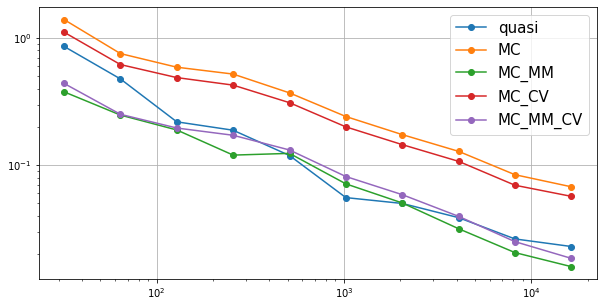

In [56]:
plt.figure(figsize=(10, 5))
for k, err in errors.items():
    scale, loc = np.polyfit(np.log(Ns), np.log(err), 1 )
    print(k, -scale)
    
    plt.loglog(Ns, err, '-o', label=k)
plt.legend(fontsize=15)
plt.grid()
None

In [57]:
errors

defaultdict(list,
            {'quasi': [0.8598574305369651,
              0.4772384474220283,
              0.21945177469273178,
              0.1884880766919952,
              0.11922161710669471,
              0.05562510012961815,
              0.05005071481607209,
              0.03869281518503676,
              0.026316925443897816,
              0.022941207270959836],
             'MC': [1.3989370213342576,
              0.7553179563497624,
              0.5902305217185115,
              0.5211216629027787,
              0.3706513888341892,
              0.24161714245156823,
              0.17412483934640105,
              0.12855888021183795,
              0.08421568930118889,
              0.0676592508656611],
             'MC_MM': [0.37784840438756395,
              0.24806720647729846,
              0.18940178418400966,
              0.12012053682112751,
              0.12393693784806623,
              0.07135146051790128,
              0.05049749017410656,
              0.03

In [39]:
nt = 20

In [45]:
nit = 10

Ns = 2 ** (np.arange(6, 15))

I1 = 0.5 * t * (np.log(S0) + np.log(St))
I2 = 0.5 * t * (S0 + St)

Canalyt = GeometricMeanAnalytical(r, sig, t, T, St, I1, Kn)

errors = defaultdict(list)

for N in tqdm(Ns):
    
    Cquasi = QuasiMonteCarloGeometricMean(r, sig, t, T, St, I1, Kn, N, nt)
    errors['quasi'].append(np.linalg.norm(Canalyt - Cquasi) ** 2)
    
    crnt_errors = defaultdict(list)
    for _ in range(nit):
        res = MonteCarloGeometricMean(r, sig, t, T, St, I1, Kn, N, nt)
        for k, c in res.items():
            crnt_errors[k].append( np.linalg.norm( c - Canalyt ) ** 2 )
    for k, err in crnt_errors.items():
        errors[k].append(np.mean(err))

100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 13.29it/s]


quasi 1.3405672684500487
MC 1.040816111359876
MC_MM 1.0646845589215879


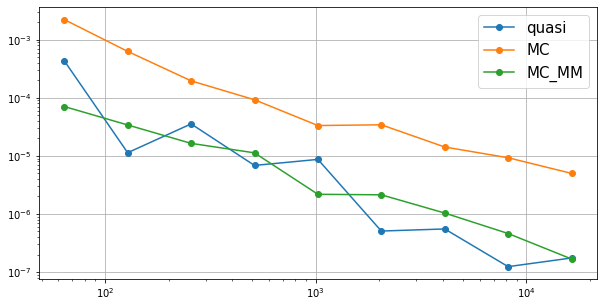

In [46]:
plt.figure(figsize=(10, 5))
for k, err in errors.items():
    scale, loc = np.polyfit(np.log(Ns), np.log(err), 1 )
    print(k, -scale)
    
    plt.loglog(Ns, err, '-o', label=k)
plt.legend(fontsize=15)
plt.grid()
None